In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [2]:
path = "UTKFace"

In [3]:
images = []
age = []
gender = []

In [4]:
for img in os.listdir(path):
  ages = img.split("_")[0]
  genders = img.split("_")[1]
  img = cv2.imread(str(path)+"/"+str(img))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  images.append(np.array(img))
  age.append(np.array(ages))
  gender.append(np.array(genders))

In [7]:
age = np.array(age,dtype=np.int64)
images = np.array(images)
ImageDataGenerator(rescale = 1./255)
gender = np.array(gender,np.uint64)

In [8]:
x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(images, age, random_state=42)

In [9]:
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(images, gender, random_state=42)

In [10]:
#Define age model and train.

In [11]:
age_model = Sequential()
age_model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(200,200,3)))
#age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

In [12]:
age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
#age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

In [13]:
age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
#age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

In [14]:
age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
#age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

In [15]:
age_model.add(Flatten())
age_model.add(Dropout(0.2))
age_model.add(Dense(512, activation='relu'))

In [16]:
age_model.add(Dense(1, activation='linear', name='age'))

In [17]:
age_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print(age_model.summary())   

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 256)      0

In [18]:
history_age = age_model.fit(x_train_age, y_train_age,
                        validation_data=(x_test_age, y_test_age), epochs=10)

Epoch 1/10
83/83 [==============================] - 487s 6s/step - loss: 415908.6250 - mae: 78.2224 - val_loss: 191.1327 - val_mae: 7.1798
Epoch 2/10
83/83 [==============================] - 537s 6s/step - loss: 87.1915 - mae: 5.0474 - val_loss: 160.2930 - val_mae: 5.5433
Epoch 3/10
83/83 [==============================] - 554s 7s/step - loss: 83.7605 - mae: 4.8507 - val_loss: 146.0383 - val_mae: 5.5716
Epoch 4/10
83/83 [==============================] - 593s 7s/step - loss: 77.9619 - mae: 4.4951 - val_loss: 145.9258 - val_mae: 4.8118
Epoch 5/10
83/83 [==============================] - 568s 7s/step - loss: 75.1413 - mae: 4.4212 - val_loss: 148.1063 - val_mae: 5.6168
Epoch 6/10
83/83 [==============================] - 584s 7s/step - loss: 77.1960 - mae: 4.5993 - val_loss: 140.7266 - val_mae: 5.1416
Epoch 7/10
83/83 [==============================] - 566s 7s/step - loss: 73.0600 - mae: 4.3745 - val_loss: 155.1903 - val_mae: 5.3242
Epoch 8/10
83/83 [==============================] - 555s 

In [19]:
age_model.save('age_model_10epochs.h5')

In [20]:
#Define gender model and train

In [64]:
gender_model = Sequential()

In [65]:
gender_model.add(Conv2D(36, kernel_size=3, activation='relu', input_shape=(200,200,3)))

In [66]:
gender_model.add(MaxPool2D(pool_size=3, strides=2))
gender_model.add(Conv2D(64, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

In [67]:
gender_model.add(Conv2D(128, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

In [68]:
gender_model.add(Conv2D(256, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

In [69]:
gender_model.add(Conv2D(512, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

In [70]:
gender_model.add(Flatten())
gender_model.add(Dropout(0.2))
gender_model.add(Dense(512, activation='relu'))
gender_model.add(Dense(1, activation='sigmoid', name='gender'))

In [71]:
gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
history_gender = gender_model.fit(x_train_gender, y_train_gender,
                        validation_data=(x_test_gender, y_test_gender), epochs=10)

Epoch 1/10
83/83 [==============================] - 142s 2s/step - loss: 3.1350 - accuracy: 0.5521 - val_loss: 0.6336 - val_accuracy: 0.6380
Epoch 2/10
83/83 [==============================] - 148s 2s/step - loss: 0.6449 - accuracy: 0.6264 - val_loss: 0.6289 - val_accuracy: 0.6369
Epoch 3/10
83/83 [==============================] - 152s 2s/step - loss: 0.6494 - accuracy: 0.6143 - val_loss: 0.6646 - val_accuracy: 0.5124
Epoch 4/10
83/83 [==============================] - 154s 2s/step - loss: 0.6390 - accuracy: 0.6396 - val_loss: 0.6405 - val_accuracy: 0.6561
Epoch 5/10
83/83 [==============================] - 157s 2s/step - loss: 0.7231 - accuracy: 0.5762 - val_loss: 0.6311 - val_accuracy: 0.6629
Epoch 6/10
83/83 [==============================] - 155s 2s/step - loss: 0.6368 - accuracy: 0.6340 - val_loss: 0.6394 - val_accuracy: 0.6606
Epoch 7/10
83/83 [==============================] - 157s 2s/step - loss: 0.6274 - accuracy: 0.6479 - val_loss: 0.6259 - val_accuracy: 0.6312
Epoch 8/10
83

In [73]:
gender_model.save('gender_model_10epochs.h5')

In [74]:
history = history_age

In [75]:
#plot the training and validation accuracy and loss at each epoch

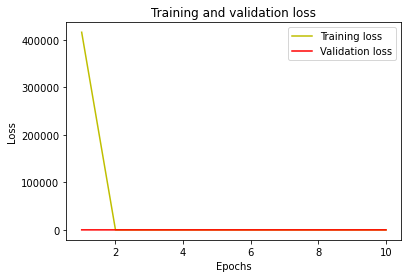

In [79]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [91]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [93]:
acc = history.history['mae']
val_acc = history.history['val_mae']

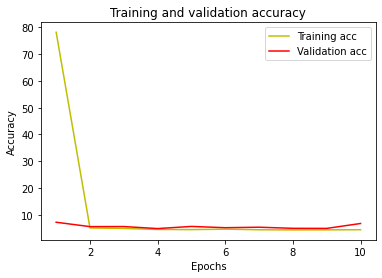

In [94]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [95]:
from keras.models import load_model
#Test the model
my_model = load_model('gender_model_10epochs.h5', compile=False)

In [96]:
predictions = my_model.predict(x_test_gender)
y_pred = (predictions>= 0.5).astype(int)[:,0]

28/28 [==============================] - 10s 351ms/step


In [97]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test_gender, y_pred))

Accuracy =  0.665158371040724


<AxesSubplot:>

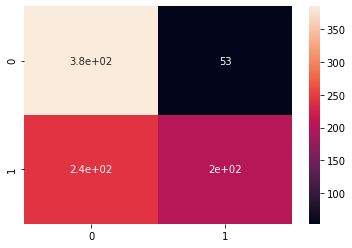

In [98]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test_gender, y_pred)  
sns.heatmap(cm, annot=True)